<a href="https://colab.research.google.com/github/jodysuseno/PraktikumML_073-076/blob/main/tugas/Tugas_3_Klasifikasi_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!wget --no-check-certificate \
    https://raw.githubusercontent.com/jodysuseno/PraktikumML_073-076/teamDetails/PlantZ.zip \
    -O /content/PlantZ.zip

--2021-10-30 10:12:31--  https://raw.githubusercontent.com/jodysuseno/PraktikumML_073-076/teamDetails/PlantZ.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52360465 (50M) [application/zip]
Saving to: ‘/content/PlantZ.zip’

/content/PlantZ.zip 100%[===================>]  49.93M   157MB/s    in 0.3s    

2021-10-30 10:12:31 (157 MB/s) - ‘/content/PlantZ.zip’ saved [52360465/52360465]



In [ ]:
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
import os
import zipfile

local_zip = '/content/PlantZ.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
os.mkdir('/content/model_cell_images')
os.mkdir('/content/model_cell_images/train')
os.mkdir('/content/model_cell_images/train/Corn_Cercospora')
os.mkdir('/content/model_cell_images/train/Corn_Common_rust')
os.mkdir('/content/model_cell_images/train/Corn_Northern_Leaf_Blight')
os.mkdir('/content/model_cell_images/train/Corn_healthy')

os.mkdir('/content/model_cell_images/valid')
os.mkdir('/content/model_cell_images/valid/Corn_Cercospora')
os.mkdir('/content/model_cell_images/valid/Corn_Common_rust')
os.mkdir('/content/model_cell_images/valid/Corn_Northern_Leaf_Blight')
os.mkdir('/content/model_cell_images/valid/Corn_healthy')

In [ ]:
import os
import shutil

#Splitting Corn Cercospera
Cercospora_original = "/content/Plant/Corn_Cercospora"
Cercospora_train = "/content/model_cell_images/train/Corn_Cercospora"
Cercospora_validation = "/content/model_cell_images/valid/Corn_Cercospora"

files = os.listdir(Cercospora_original)
# memindahkan 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{Cercospora_original}/{file}", Cercospora_train)

#=========================================================
files2 = os.listdir(Cercospora_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{Cercospora_original}/{file}", Cercospora_validation)

In [ ]:
#Splitting Corn Commont_rust
Common_original = "/content/Plant/Corn_Common_rust"
Common_train = "/content/model_cell_images/train/Corn_Common_rust"
Common_validation = "/content/model_cell_images/valid/Corn_Common_rust"

files = os.listdir(Common_original)
# memindahkan 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{Common_original}/{file}", Common_train)

#=========================================================
files2 = os.listdir(Common_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{Common_original}/{file}", Common_validation)

In [ ]:
#Splitting Corn Leaf Blight
Northern_original = "/content/Plant/Corn_Northern_Leaf_Blight"
Northern_train = "/content/model_cell_images/train/Corn_Northern_Leaf_Blight"
Northern_validation = "/content/model_cell_images/valid/Corn_Northern_Leaf_Blight"

files = os.listdir(Northern_original)
# memindahkan 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{Northern_original}/{file}", Northern_train)

#=========================================================
files2 = os.listdir(Northern_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{Northern_original}/{file}", Northern_validation)

In [ ]:
#Splitting Corn Healthy
Healty_original = "/content/Plant/Corn_healthy"
Healty_train = "/content/model_cell_images/train/Corn_healthy"
Healty_validation = "/content/model_cell_images/valid/Corn_healthy"

files = os.listdir(Healty_original)
# memindahkan 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{Healty_original}/{file}", Healty_train)

#=========================================================
files2 = os.listdir(Healty_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{Healty_original}/{file}", Healty_validation)

In [ ]:
file_train_Cercos = os.listdir(Cercospora_train)
file_Val_Cercos = os.listdir(Cercospora_validation)

file_train_Common = os.listdir(Common_train)
file_Val_Common = os.listdir(Common_validation)

file_train_Northern = os.listdir(Northern_train)
file_Val_Northern = os.listdir(Northern_validation)

file_train_healthy = os.listdir(Healty_train)
file_Val_healthy = os.listdir(Healty_validation)

#=================================================

print(file_train_Cercos[0:int(len(file_train_Cercos) * .001)])
print("data Cercos train : " + str(len(file_train_Cercos)))
print("data Cercos validation : " + str(len(file_Val_Cercos)))

print("data Common train : " + str(len(file_train_Common)))
print("data Common validation : " + str(len(file_Val_Common)))

print("data Northern train : " + str(len(file_train_Northern)))
print("data Northern validation : " + str(len(file_Val_Northern)))

print("data Healthy train : " + str(len(file_train_healthy)))
print("data Healthy validation : " + str(len(file_Val_healthy)))

[]
data Cercos train : 359
data Cercos validation : 154
data Common train : 834
data Common validation : 358
data Northern train : 689
data Northern validation : 296
data Healthy train : 813
data Healthy validation : 349


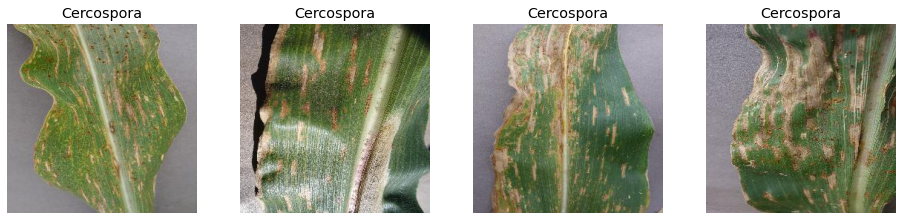

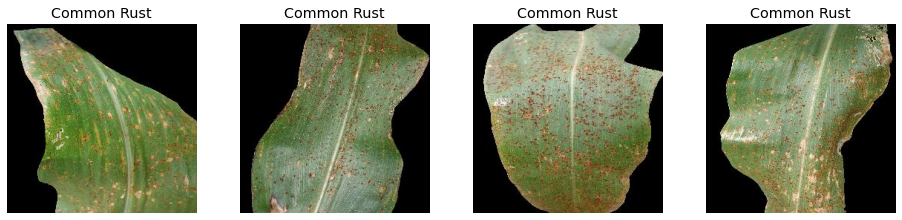

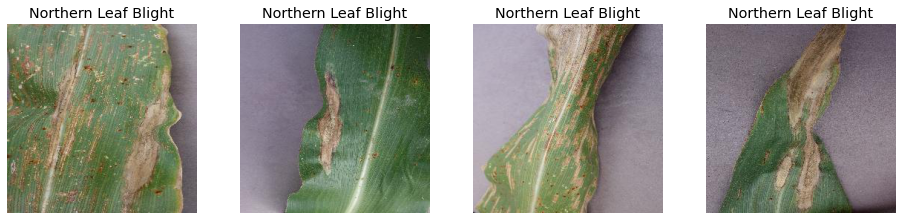

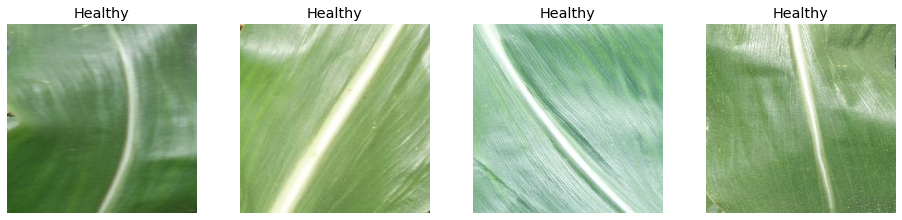

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

Cercospora_dir=os.path.join('/content/model_cell_images/train/Corn_Cercospora')
Common_dir=os.path.join('/content/model_cell_images/train/Corn_Common_rust')
Northern_dir=os.path.join('/content/model_cell_images/train/Corn_Northern_Leaf_Blight')
Healthy_dir=os.path.join('/content/model_cell_images/train/Corn_healthy')

Cercospora_image = os.listdir(Cercospora_dir)
Common_image = os.listdir(Common_dir)
Northern_image = os.listdir(Northern_dir)
Healthy_image = os.listdir(Healthy_dir)

fname1 = [os.path.join(Cercospora_dir,fname)
        for fname in Cercospora_image[:4]]

fname2 = [os.path.join(Common_dir,fname)
        for fname in Common_image[:4]]

fname3 = [os.path.join(Northern_dir,fname)
        for fname in Northern_image[:4]]

fname4 = [os.path.join(Healthy_dir,fname)
        for fname in Healthy_image[:4]]

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)#
for i,fname in enumerate(fname1):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Cercospora')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Common Rust')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Northern Leaf Blight')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Healthy')
    plt.imshow(img)
    
plt.show()

In [ ]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join('/content/model_cell_images/train')
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []

vali_dir=os.path.join('/content/model_cell_images/valid')
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".JPG" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1769, 150, 150, 3)
Train Label =  (1769,)
Validation Data =  (760, 150, 150, 3)
Validation Label =  (760,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[10][0][0])
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[10][0][0])

Data sebelum di-normalisasi  [ 81 156 105]
Data setelah di-normalisasi  [0.31764707 0.6117647  0.4117647 ]


In [ ]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['Corn_Common_rust' 'Corn_Common_rust' 'Corn_Common_rust'
 'Corn_Common_rust' 'Corn_Common_rust' 'Corn_Common_rust'
 'Corn_Common_rust' 'Corn_Common_rust' 'Corn_Common_rust'
 'Corn_Common_rust']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


DEFINISIKAN MODEL

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
89/89 [==============================] - 2s 13ms/step - loss: -1822.8082 - acc: 0.4720 - val_loss: -4649.7788 - val_acc: 0.4711
Epoch 2/50
89/89 [==============================] - 1s 10ms/step - loss: -9825.1455 - acc: 0.4715 - val_loss: -16396.1426 - val_acc: 0.4711
Epoch 3/50
89/89 [==============================] - 1s 10ms/step - loss: -25107.4941 - acc: 0.4715 - val_loss: -35579.7305 - val_acc: 0.4711
Epoch 4/50
89/89 [==============================] - 1s 10ms/step - loss: -48139.8789 - acc: 0.4715 - val_loss: -61800.0859 - val_acc: 0.4711
Epoch 5/50
89/89 [==============================] - 1s 10ms/step - loss: -77826.0312 - acc: 0.4715 - val_loss: -96064.7578 - val_acc: 0.4711
Epoch 6/50
89/89 [==============================] - 1s 10ms/step - loss: -114550.9609 - acc: 0.4715 - val_loss: -134293.9375 - val_acc: 0.4711
Epoch 7/50
89/89 [==============================] - 1s 10ms/step - loss: -157636.4531 - acc: 0.4715 - val_loss: -181312.8281 - val_acc: 0.4711
Epoch 8/50
8

Evaluasi Model

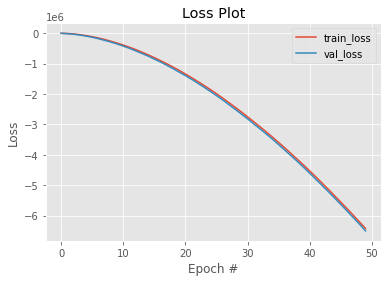

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

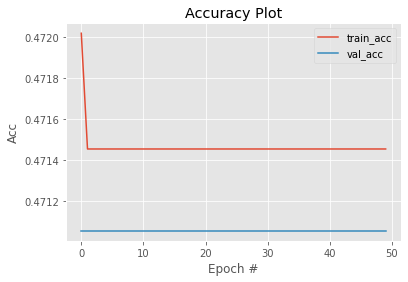

In [ ]:

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.47      1.00      0.64       358
           2       0.00      0.00      0.00       262
           3       0.00      0.00      0.00         7

    accuracy                           0.47       760
   macro avg       0.12      0.25      0.16       760
weighted avg       0.22      0.47      0.30       760

